In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Description of the dataset, as available on Kaggle, is as follows. Learn more : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Attribute information (runs from 1 to 5110)
>1) id: unique identifier

>2) gender: "Male", "Female" or "Other"

>3) age: age of the patient

>4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

>5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

>6) ever_married: "No" or "Yes"

>7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

>8) Residence_type: "Rural" or "Urban"

>9) avg_glucose_level: average glucose level in blood

>10) bmi: body mass index

>11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

>12) stroke: 1 if the patient had a stroke or 0 if not

>*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
strokeData = pd.read_csv('healthcare-dataset-stroke-data.csv')
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
strokeData.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Plotting the Correlation matrix (before data cleaning)

<AxesSubplot:>

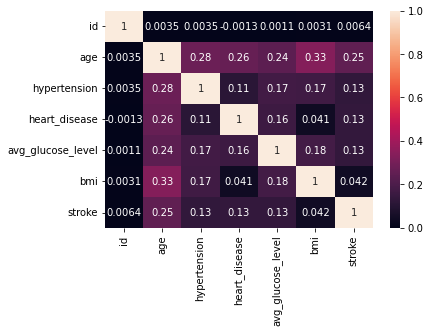

In [5]:
#plt.figure(figsize=(50,30))
sb.heatmap(strokeData.corr(),annot=True)

<font color = Purple>As seen from the correlation matrix above, the correlation between the various variables is not very strong, with the highest only at 0.33. Hence, we will be cleaning the data for more accurate comparisions between variables.

### Data Cleaning

In [81]:
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [82]:
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
data_cleaning_suggestions(strokeData)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
id,5110,int64,0,0.000000,100.000000,0,possible ID column: drop
avg_glucose_level,3979,float64,0,0.000000,77.866928,0,skewed: cap or drop outliers
bmi,418,float64,201,3.933464,8.180039,0,"fill missing, skewed: cap or drop outliers"
age,104,float64,0,0.000000,2.035225,0,
work_type,5,object,0,0.000000,0.097847,22,
smoking_status,4,object,0,0.000000,0.078278,789,
gender,3,object,0,0.000000,0.058708,1,
hypertension,2,int64,0,0.000000,0.039139,0,
heart_disease,2,int64,0,0.000000,0.039139,0,
ever_married,2,object,0,0.000000,0.039139,1757,


### Checking for outliers

<font color = Purple>We used the “data_cleaning_suggestions” function to have an overview of the variables that need to be cleaned. 

<font color = Purple>We first replaced the “Nan” and “unknown” values in bmi with its median value, and then dropped outliers 

In [6]:
import scipy.stats as stats
def check_outliers(strokeData, variable):
    
    #define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sb.histplot(strokeData[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(strokeData[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

# boxplot
    plt.subplot(1, 3, 3)
    sb.boxplot(y=strokeData[variable])
    plt.title('Boxplot')

    plt.show()

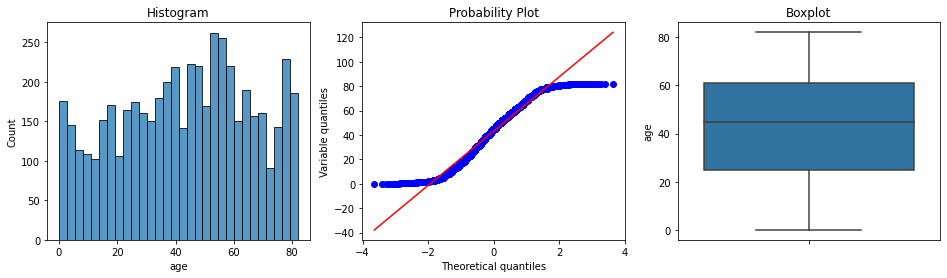

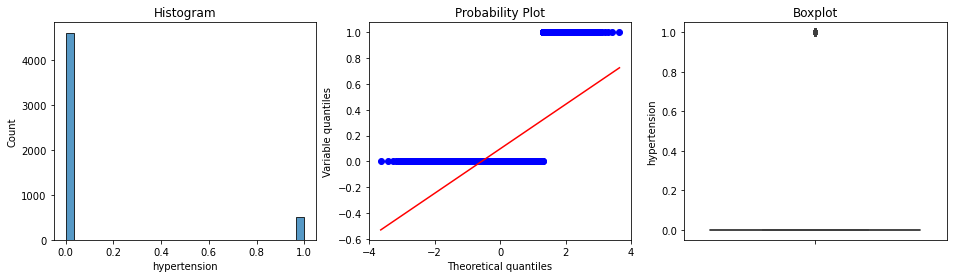

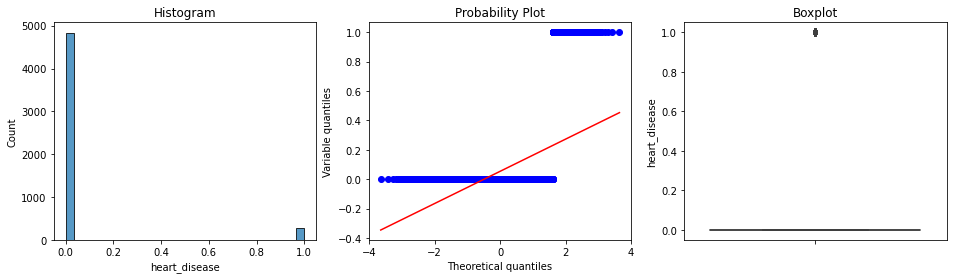

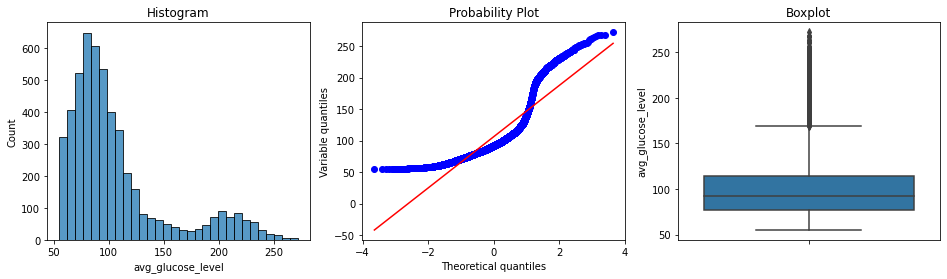

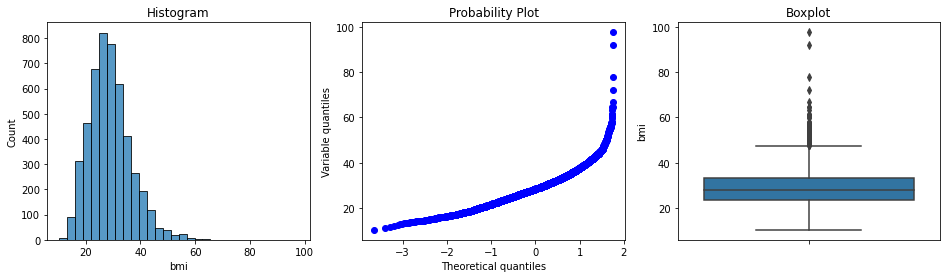

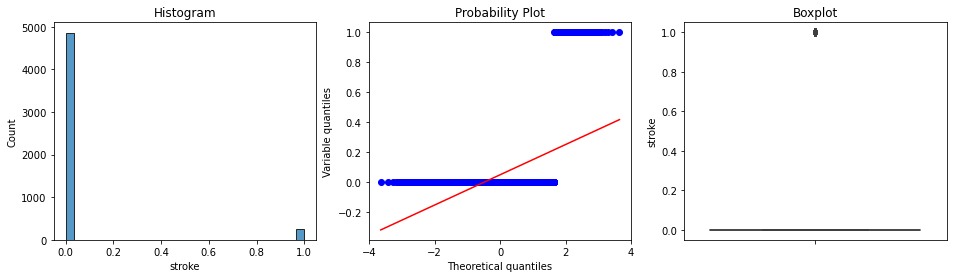

In [7]:
numerical_features = [feature for feature in strokeData.columns if strokeData[feature].dtype != 'object' and feature != 'id']
for feature in numerical_features:
    check_outliers(strokeData, feature)

<font color = Purple> In the probability plot, the further the points vary from the red line, the greater the indication of departures from normality.

In [8]:
#remove NaN in bmi and replace with median so data is still usable
bmiMedian = strokeData['bmi'].median()
strokeData['bmi'] = strokeData['bmi'].replace("unknown", "Nan")
strokeData['bmi'] = strokeData['bmi'].fillna(bmiMedian)

<font color = Purple>By dropping outliers, we have a less skewed data set

In [9]:
#drop outliers from bmi and avg_glucose_level

#drop from bmi first
#IQR
Q1 = strokeData['bmi'].quantile(0.25)
Q3 = strokeData['bmi'].quantile(0.75)
IQR = Q3 - Q1
 
print("Old Shape: ", strokeData.shape)

# Upper bound
upper = Q3 + 1.5 * IQR
# Lower bound
lower = Q1 - 1.5 * IQR
 
# Select rows that fall outside bounds
outliers = strokeData[(strokeData['bmi'] < lower) | (strokeData['bmi'] > upper)]

# Drop selected rows
strokeData = strokeData.drop(outliers.index)

print("New Shape: ", strokeData.shape)
    
strokeData.head()

Old Shape:  (5110, 12)
New Shape:  (4984, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
#drop from avg_glucose_level next
#IQR
Q1 = strokeData['avg_glucose_level'].quantile(0.25)
Q3 = strokeData['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
 
print("Old Shape: ", strokeData.shape)

# Upper bound
upper = Q3 + 1.5 * IQR
# Lower bound
lower = Q1 - 1.5 * IQR
 
# Select rows that fall outside bounds
outliers = strokeData[(strokeData['avg_glucose_level'] < lower) | (strokeData['avg_glucose_level'] > upper)]

# Drop selected rows
strokeData = strokeData.drop(outliers.index)

print("New Shape: ", strokeData.shape)
    
strokeData.head()

Old Shape:  (4984, 12)
New Shape:  (4390, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [11]:
strokeData = pd.DataFrame(strokeData)
strokeData.shape

(4390, 12)

In [12]:
# drop ID column since it does not aid in the prediction of stroke
strokeData = strokeData.drop('id', axis = 1)

In [13]:
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4390 non-null   object 
 1   age                4390 non-null   float64
 2   hypertension       4390 non-null   int64  
 3   heart_disease      4390 non-null   int64  
 4   ever_married       4390 non-null   object 
 5   work_type          4390 non-null   object 
 6   Residence_type     4390 non-null   object 
 7   avg_glucose_level  4390 non-null   float64
 8   bmi                4390 non-null   float64
 9   smoking_status     4390 non-null   object 
 10  stroke             4390 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 411.6+ KB


<font color = Purple> After cleaning the data, we extracted each individual variable into their respective data frames for use later on in the analysis

In [14]:
#Extract individual columns into their respective data frames
gender = pd.DataFrame(strokeData['gender'])
age = pd.DataFrame(strokeData['age'])
hypertension = pd.DataFrame(strokeData['hypertension'])
heart_disease = pd.DataFrame(strokeData['heart_disease'])
ever_married = pd.DataFrame(strokeData['ever_married'])
work_type = pd.DataFrame(strokeData['work_type'])
Residence_type = pd.DataFrame(strokeData['Residence_type'])
avg_glucose_level = pd.DataFrame(strokeData['avg_glucose_level'])
bmi = pd.DataFrame(strokeData['bmi'])
smoking_status = pd.DataFrame(strokeData['smoking_status'])
stroke = pd.DataFrame(strokeData['stroke'])

### Correlation between numerical variables

In [15]:
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4390 non-null   object 
 1   age                4390 non-null   float64
 2   hypertension       4390 non-null   int64  
 3   heart_disease      4390 non-null   int64  
 4   ever_married       4390 non-null   object 
 5   work_type          4390 non-null   object 
 6   Residence_type     4390 non-null   object 
 7   avg_glucose_level  4390 non-null   float64
 8   bmi                4390 non-null   float64
 9   smoking_status     4390 non-null   object 
 10  stroke             4390 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 411.6+ KB


<AxesSubplot:>

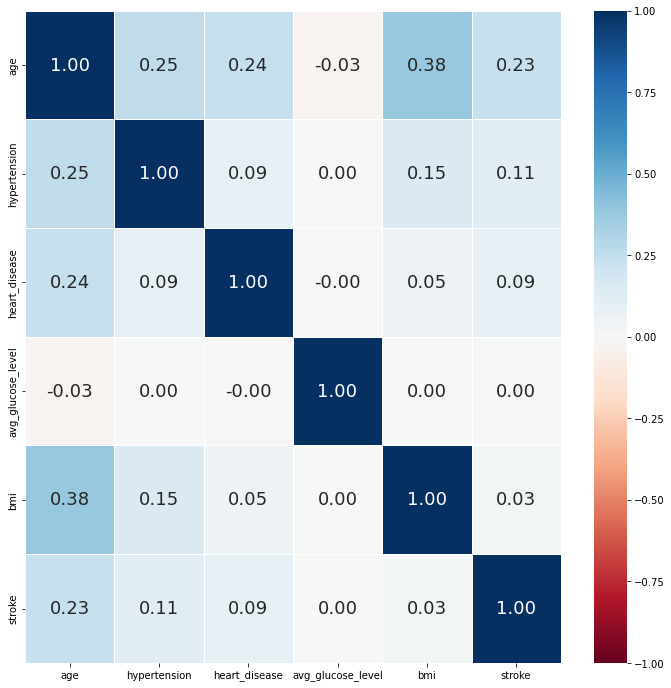

In [16]:
#finding out correlation between variables
corre = strokeData
f = plt.figure(figsize=(12, 12))
sb.heatmap(corre.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

<font color = Purple>Correlation between variables is stronger with the highest value at 0.38 after cleaning the data, as seen from the correlation matrix above.

### Distribution of variables

<font color = Purple> We will start off by plotting the general distribution of variables, and then compare the variables between each other. We will choose and filter out the variables that have higher correlation with respect to stroke.

C:\Users\Shu Shuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

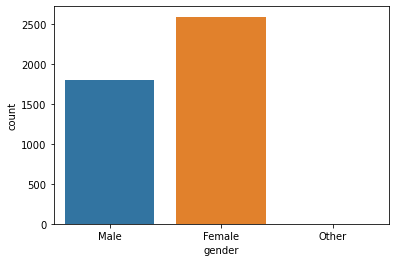

In [17]:
#find out gender distribution
sb.countplot(strokeData['gender'])

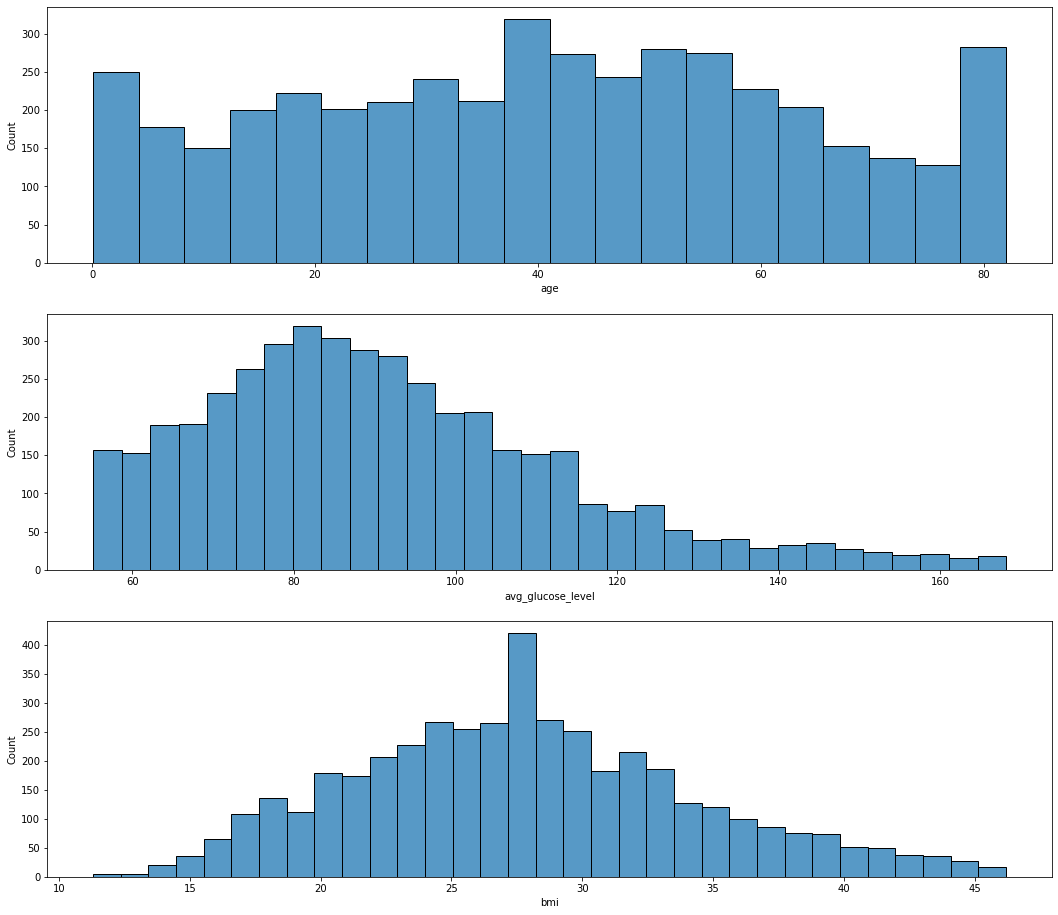

In [18]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(strokeData[["age", "avg_glucose_level", "bmi"]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

# Draw the distributions of all variables
f, axes = plt.subplots(3, 1, figsize=(18, 16))

count = 0
for var in numeric_data:
    sb.histplot(data = numeric_data[var], ax = axes[count])
    count += 1

C:\Users\Shu Shuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

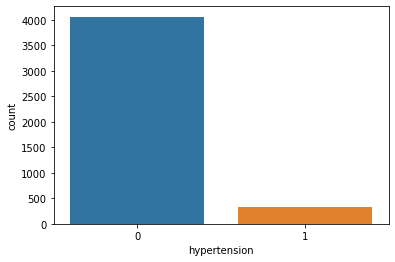

In [19]:
#hypertension occurence
sb.countplot(strokeData['hypertension'])

C:\Users\Shu Shuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

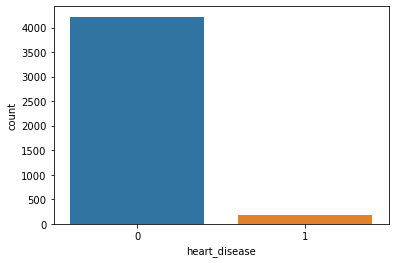

In [20]:
#heart disease occurence
sb.countplot(strokeData['heart_disease'])

C:\Users\Shu Shuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

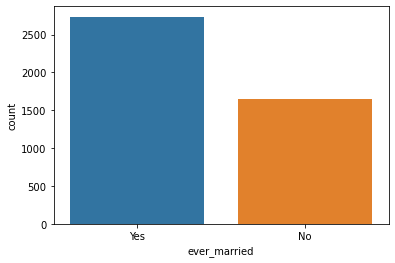

In [21]:
#ever married occurence
sb.countplot(strokeData['ever_married'])

C:\Users\Shu Shuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

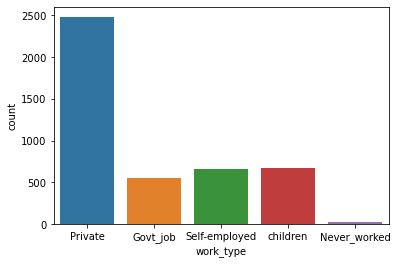

In [22]:
#work type distribution
sb.countplot(strokeData['work_type'])

C:\Users\Shu Shuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

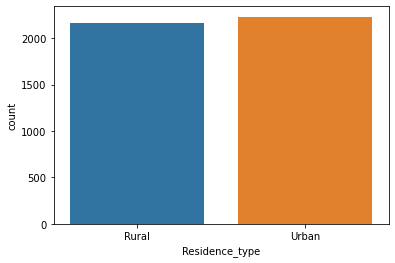

In [23]:
#residence type distribution
sb.countplot(strokeData['Residence_type'])

C:\Users\Shu Shuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

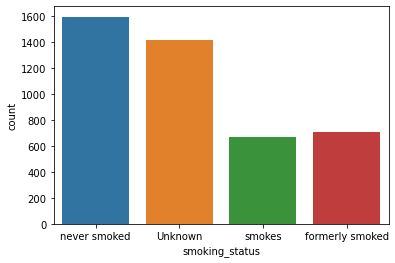

In [24]:
#smoking status distribution
sb.countplot(strokeData['smoking_status'])

C:\Users\Shu Shuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

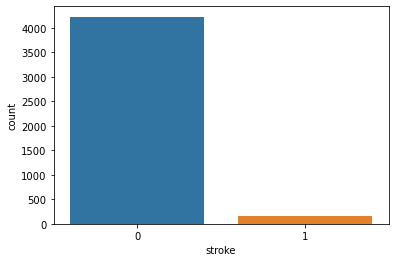

In [25]:
#stroke distribution
#(can use this to explain minor challenges, imbalance data later on)
sb.countplot(strokeData['stroke'])

<font color = Purple> For variables such as stroke, heart disease and hypertension, the data is imbalanced, which may skew our class distribution.

### Comparing age against other variables 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

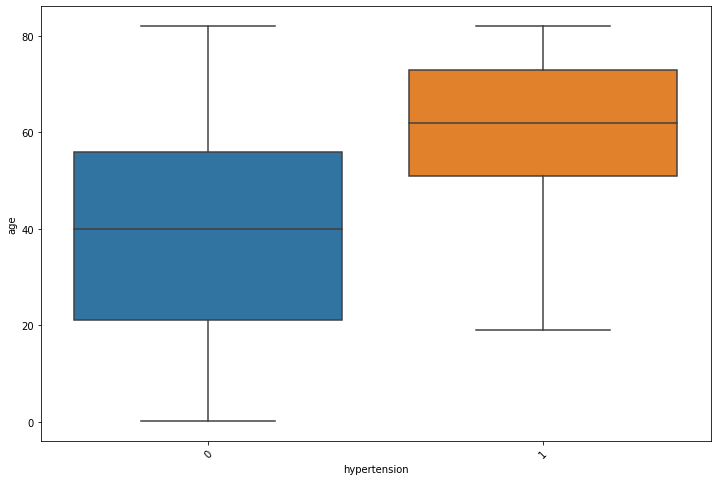

In [26]:
#age vs hypertension
ageDFcat = pd.DataFrame(strokeData[['hypertension', 'smoking_status', 'heart_disease', 'stroke','age','work_type']])
f=plt.figure(figsize=(12,8))
sb.boxplot(x='hypertension', y = 'age',data = ageDFcat,order = ageDFcat.groupby('hypertension')['age'].median().sort_values().index)

plt.xticks(rotation =45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'never smoked'),
  Text(2, 0, 'smokes'),
  Text(3, 0, 'formerly smoked')])

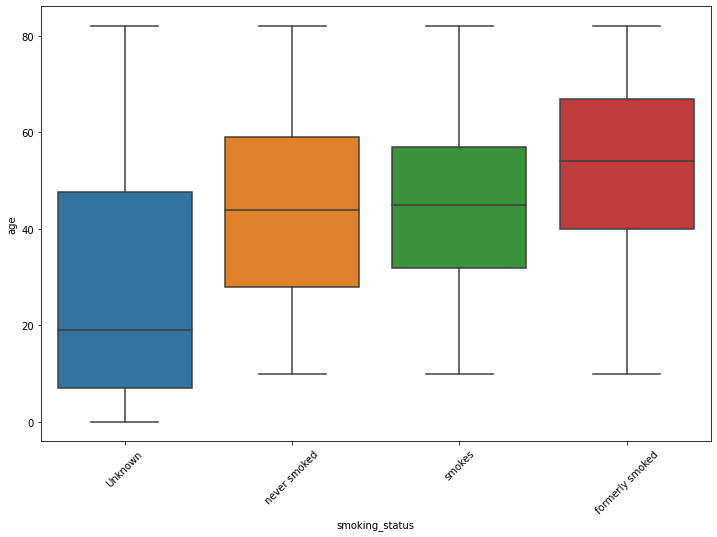

In [27]:
#age vs smoking status
f=plt.figure(figsize=(12,8))
sb.boxplot(x='smoking_status', y = 'age',data = ageDFcat,order = ageDFcat.groupby('smoking_status')['age'].median().sort_values().index)

plt.xticks(rotation =45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

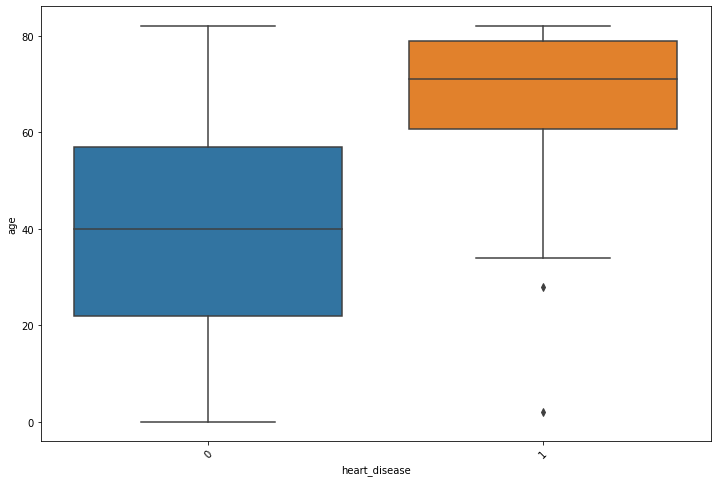

In [28]:
# age vs heart disease
f=plt.figure(figsize=(12,8))
sb.boxplot(x='heart_disease', y = 'age',data = ageDFcat,order = ageDFcat.groupby('heart_disease')['age'].median().sort_values().index)

plt.xticks(rotation =45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'children'),
  Text(1, 0, 'Never_worked'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Govt_job'),
  Text(4, 0, 'Self-employed')])

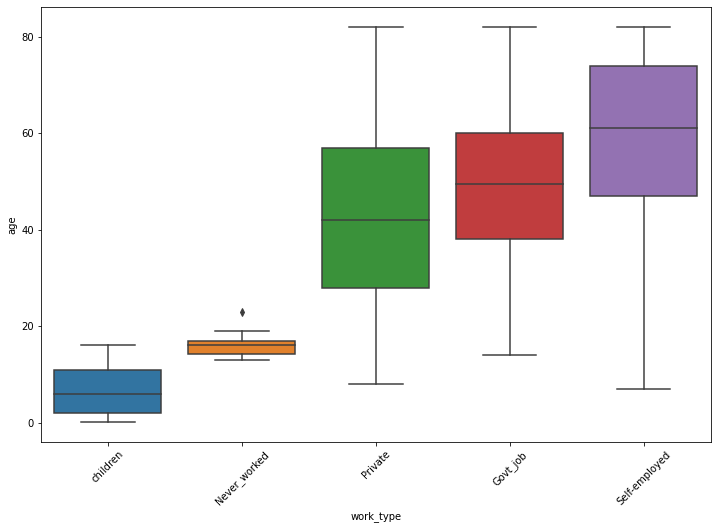

In [29]:
#age vs work_type
f=plt.figure(figsize=(12,8))
sb.boxplot(x='work_type', y = 'age',data = ageDFcat,order = ageDFcat.groupby('work_type')['age'].median().sort_values().index)

plt.xticks(rotation =45)

<font color = Purple>As seen in the box plots that compares age against hypertension, smoking status, heartdisease and work type. There is a strong correlation between these variables as the box two box plots have very different medians and the plots are very distinct.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

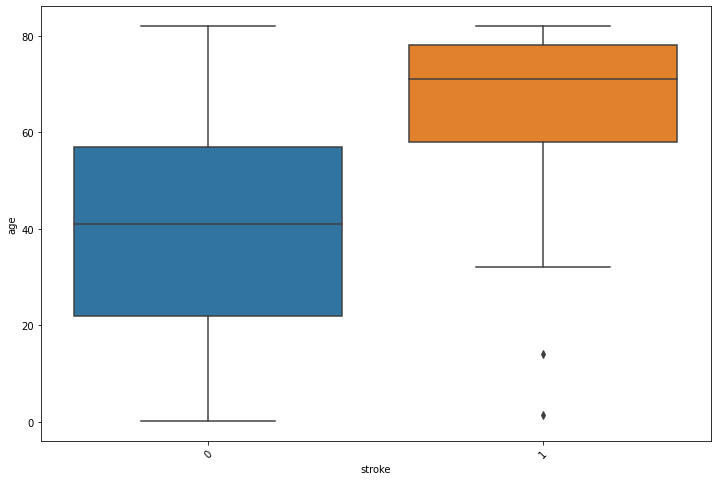

In [30]:
#age vs stroke
f=plt.figure(figsize=(12,8))
sb.boxplot(x='stroke', y = 'age',data = ageDFcat,order = ageDFcat.groupby('stroke')['age'].median().sort_values().index)

plt.xticks(rotation =45)

<font color = Purple> As seen in the box plot that compares age against stroke, there is a strong correlation between these variables as the box plot has very different medians and the plots are very distinct. Hence, age is a good indicator to predict stroke.

### Comparing hypertension against heart disease

<AxesSubplot:xlabel='heart_disease', ylabel='hypertension'>

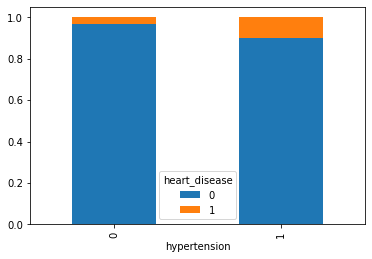

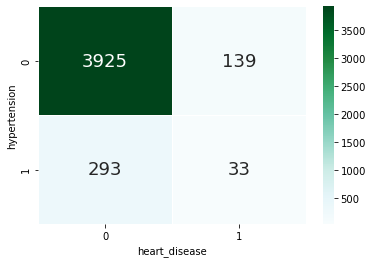

In [31]:
#Hypertension vs heart disease
jointhypHD = pd.concat([hypertension, heart_disease], axis = 1).reindex(hypertension.index)
jointhypHD.head()
(pd.crosstab(jointhypHD['hypertension'],jointhypHD['heart_disease'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointhypHD.groupby(['hypertension', 'heart_disease']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<font color = Purple> There is no strong correlation between hypertension and heart disease. The chances of getting hypertension is low if there is no heart disease, vice versa.

### Comparing Gender against other variables

<AxesSubplot:xlabel='hypertension', ylabel='gender'>

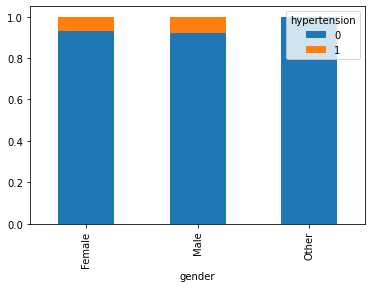

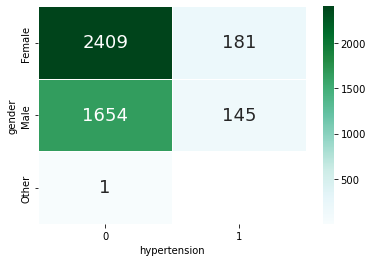

In [32]:
#Gender vs hypertension
jointgenhyp = pd.concat([gender, hypertension], axis = 1).reindex(gender.index)
jointgenhyp.head()
(pd.crosstab(jointgenhyp['gender'],jointgenhyp['hypertension'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointgenhyp.groupby(['gender', 'hypertension']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#results: Gender as a factor of occurence of hypertension is not very strong, since both male and female have roughly same risk

<AxesSubplot:xlabel='heart_disease', ylabel='gender'>

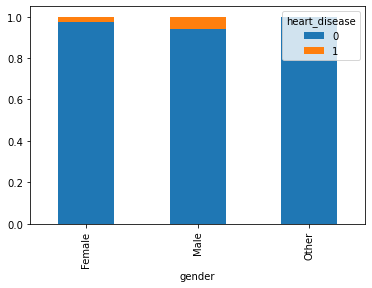

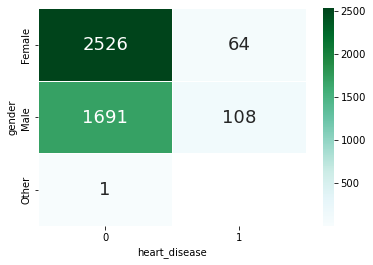

In [33]:
#Gender vs heart disease
jointgenHD = pd.concat([gender, heart_disease], axis = 1).reindex(gender.index)
jointgenHD.head()
(pd.crosstab(jointgenHD['gender'],jointgenHD['heart_disease'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointgenHD.groupby(['gender', 'heart_disease']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
#results: Males have slightly higher chances of heart disease

<AxesSubplot:xlabel='avg_glucose_level', ylabel='gender'>

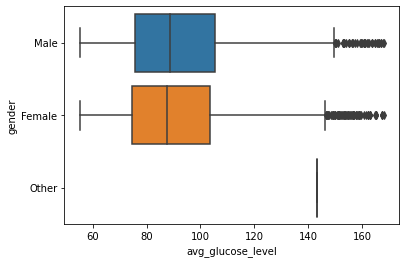

In [34]:
#Gender vs avg_glucose_level
jointgenGL = pd.concat([gender, avg_glucose_level], axis = 1).reindex(gender.index)

sb.boxplot(data = jointgenGL, x= 'avg_glucose_level', y= 'gender')
#results: There is not much difference between genders and their average glucose levels

<AxesSubplot:xlabel='bmi', ylabel='gender'>

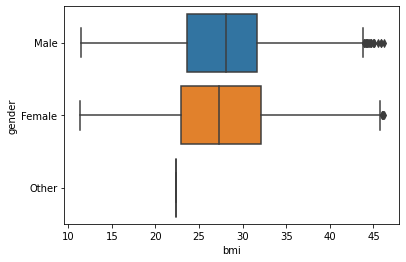

In [35]:
#Gender vs bmi
jointgenbmi = pd.concat([gender, bmi], axis = 1).reindex(gender.index)

sb.boxplot(data = jointgenbmi, x= 'bmi', y= 'gender')
#results: There is not much difference between genders and their bmi

<AxesSubplot:xlabel='smoking_status', ylabel='gender'>

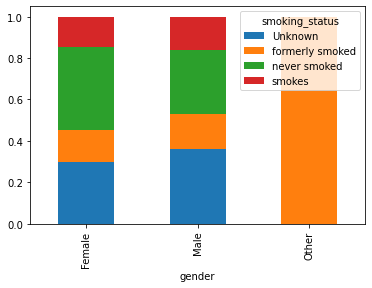

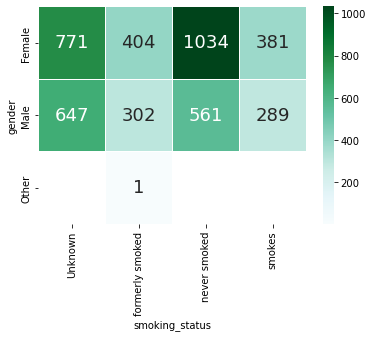

In [36]:
#Gender vs smoking_status
jointgenSS = pd.concat([gender, smoking_status], axis = 1).reindex(gender.index)

(pd.crosstab(jointgenSS['gender'],jointgenSS['smoking_status'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointgenSS.groupby(['gender', 'smoking_status']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='stroke', ylabel='gender'>

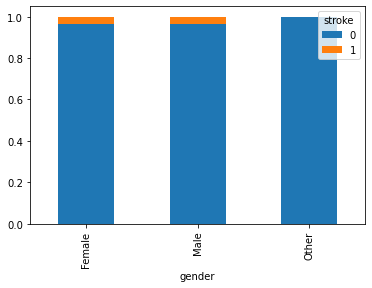

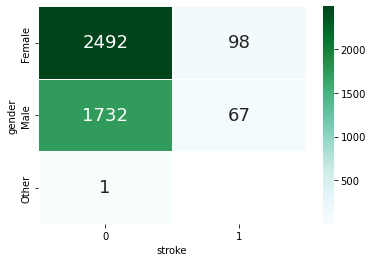

In [37]:
#Gender vs stroke
jointgenS = pd.concat([gender, stroke], axis = 1).reindex(gender.index)

(pd.crosstab(jointgenS['gender'],jointgenS['stroke'], normalize='index').plot.bar(stacked=True))

f = plt.figure(figsize=(6, 4))
sb.heatmap(jointgenS.groupby(['gender', 'stroke']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
#There is not much diffence between genders and the occurence of stroke

<font color = Purple> The correlation between gender and other variables is not strong, hence, we will not be using it as a factor to predict stroke.

### Comapring residence type against other variables 

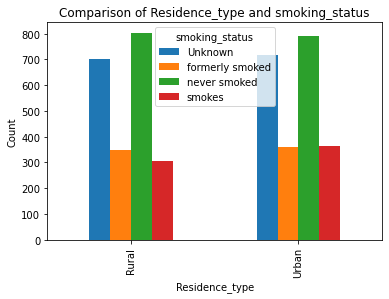

<AxesSubplot:xlabel='smoking_status', ylabel='Residence_type'>

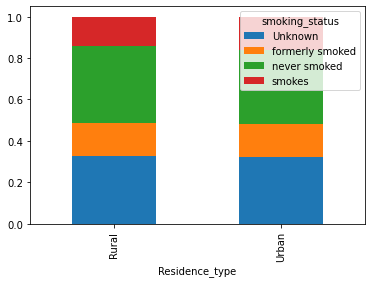

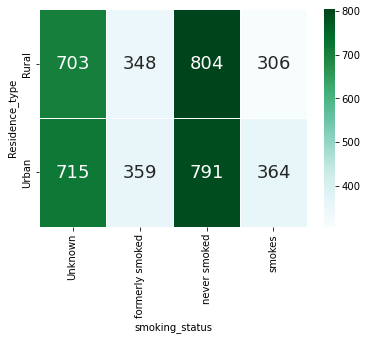

In [38]:
#compare residence with smoking status 
jointresSS = pd.concat([Residence_type, smoking_status], axis = 1).reindex(Residence_type.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointresSS.groupby(['Residence_type', 'smoking_status']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='Residence_type', columns='smoking_status', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('Residence_type')
plt.ylabel('Count')
plt.title('Comparison of Residence_type and smoking_status')
plt.show()

(pd.crosstab(jointresSS['Residence_type'],jointresSS['smoking_status'], normalize='index').plot.bar(stacked=True))

#Using heatmap
f = plt.figure(figsize=(6, 4))
sb.heatmap(jointresSS.groupby(['Residence_type', 'smoking_status']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")


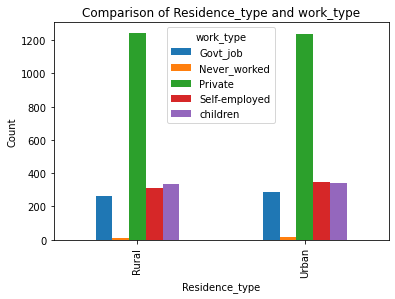

<AxesSubplot:xlabel='Residence_type'>

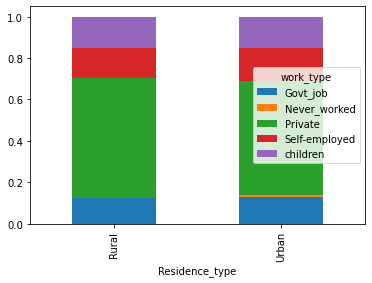

In [39]:
#compare residence with work type
jointresWT = pd.concat([Residence_type, work_type], axis = 1).reindex(Residence_type.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointresWT.groupby(['Residence_type', 'work_type']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='Residence_type', columns='work_type', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('Residence_type')
plt.ylabel('Count')
plt.title('Comparison of Residence_type and work_type')
plt.show()

(pd.crosstab(jointresWT['Residence_type'],jointresWT['work_type'], normalize='index').plot.bar(stacked=True))

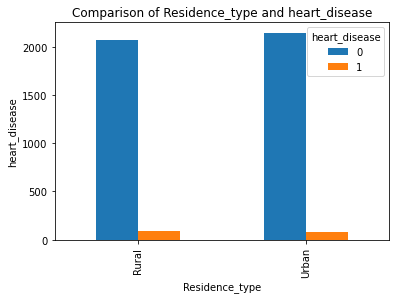

<AxesSubplot:xlabel='Residence_type'>

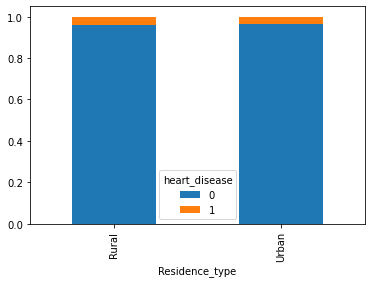

In [40]:
#compare residence with heart disease
jointresHD = pd.concat([Residence_type, heart_disease], axis = 1).reindex(Residence_type.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointresHD.groupby(['Residence_type', 'heart_disease']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='Residence_type', columns='heart_disease', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('Residence_type')
plt.ylabel('heart_disease')
plt.title('Comparison of Residence_type and heart_disease')
plt.show()

(pd.crosstab(jointresHD['Residence_type'],jointresHD['heart_disease'], normalize='index').plot.bar(stacked=True))

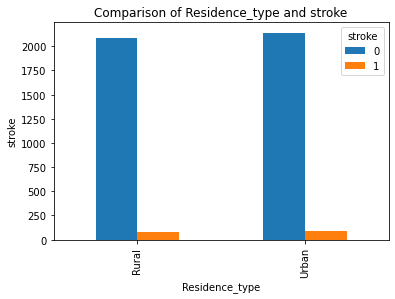

<AxesSubplot:xlabel='Residence_type'>

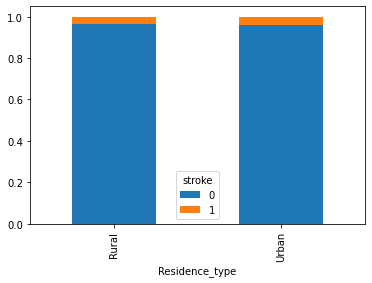

In [41]:
#compare residence with stroke
jointresS = pd.concat([Residence_type, stroke], axis = 1).reindex(Residence_type.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointresS.groupby(['Residence_type', 'stroke']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='Residence_type', columns='stroke', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('Residence_type')
plt.ylabel('stroke')
plt.title('Comparison of Residence_type and stroke')
plt.show()

(pd.crosstab(jointresS['Residence_type'],jointresS['stroke'], normalize='index').plot.bar(stacked=True))

<font color = Purple> After comparing Residence type against smoking status, work type, heart disease and stroke, we found out that are is little to no differnce between the residence type. Hence, we will not be using Residence type as a predictor to predict stroke occurence.

### Comparing smoking status against other variables 

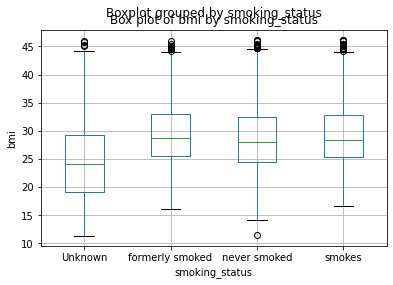

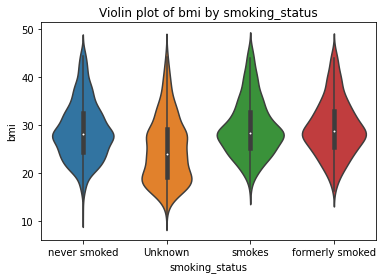

In [42]:
#smoking_status with bmi
jointSSbmi = pd.concat([smoking_status, bmi], axis = 1).reindex(smoking_status.index)

jointSSbmi.boxplot(column='bmi', by='smoking_status')

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('bmi')
plt.title('Box plot of bmi by smoking_status')
plt.show()

sb.violinplot(x='smoking_status', y='bmi', data=jointSSbmi)

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('bmi')
plt.title('Violin plot of bmi by smoking_status')
plt.show()

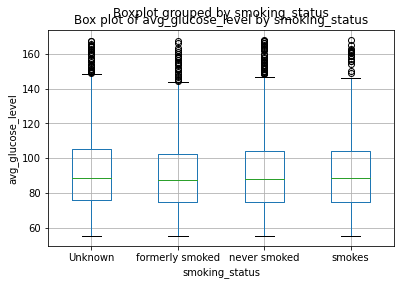

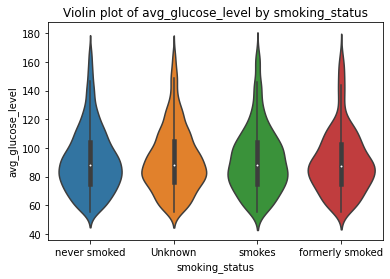

In [43]:
#smoking_status with avg_glucose_level
jointSSGL = pd.concat([smoking_status, avg_glucose_level], axis = 1).reindex(smoking_status.index)

jointSSGL.boxplot(column='avg_glucose_level', by='smoking_status')

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('avg_glucose_level')
plt.title('Box plot of avg_glucose_level by smoking_status')
plt.show()

sb.violinplot(x='smoking_status', y='avg_glucose_level', data=jointSSGL)

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('avg_glucose_level')
plt.title('Violin plot of avg_glucose_level by smoking_status')
plt.show()

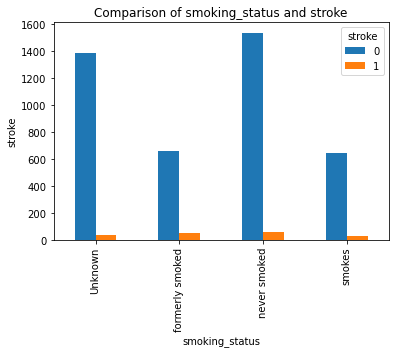

<AxesSubplot:xlabel='stroke', ylabel='smoking_status'>

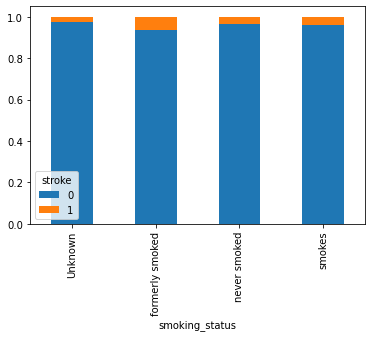

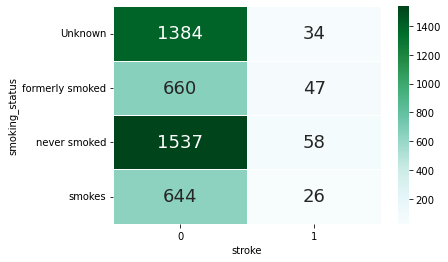

In [44]:
#smoking stauts with stroke
jointSSS = pd.concat([smoking_status, stroke], axis = 1).reindex(smoking_status.index)

# Count the number of occurrences of each category of var1 and var2
counts = jointSSS.groupby(['smoking_status', 'stroke']).size().reset_index(name='count')

# Plot the grouped bar chart
counts.pivot(index='smoking_status', columns='stroke', values='count').plot(kind='bar')

# Add labels and title
plt.xlabel('smoking_status')
plt.ylabel('stroke')
plt.title('Comparison of smoking_status and stroke')
plt.show()

(pd.crosstab(jointSSS['smoking_status'],jointSSS['stroke'], normalize='index').plot.bar(stacked=True))

#using heatmap
f = plt.figure(figsize=(6, 4))
sb.heatmap(jointSSS.groupby(['smoking_status', 'stroke']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<font color = Purple>The probability of those who either formerly smoked or smokes getting stroke is higher than those who never smoked. We could use smoking status as a predictor to predict the occurence of stroke

### Using Chi Square test 

We will further filter out and analyse the variables by making use of chi square test to choose variables that predict stroke most accurately 

<font color = Purple>The chi-square test of significance tells you how likely the data you have observed is to have occurred under the null hypothesis, which is that the variable has no statistical significance. If the p-value is smaller than 0.05, the data is likely to have statistical significance, and the null hypothesis is false. However, if the p-value is greater than 0.05, the data is likely to not have statistical significance, and the null hypothesis is true.

In [45]:
#comparing between hypertension and heart disease
from scipy.stats import chi2_contingency
HypHeartJoint = pd.crosstab(strokeData['hypertension'], strokeData['heart_disease'])
chi2, pval, dof, expected = chi2_contingency(HypHeartJoint)
if pval < 0.05:
    print('The two variables, hypertension and heart disease are dependent.')
else:
    print('The two variables, hypertension and heart disease are independent.')

The two variables, hypertension and heart disease are dependent.


In [46]:
#comparing between smoking status and stroke
smokeSJoint = pd.crosstab(strokeData['smoking_status'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(smokeSJoint)
if pval < 0.05:
    print('The two variables, smoking status and stroke are dependent.')
else:
    print('The two variables, smoking status and stroke are independent.')

The two variables, smoking status and stroke are dependent.


In [47]:
#comparing between smoking status and worktype
smokeWorkJoint = pd.crosstab(strokeData['smoking_status'], strokeData['work_type'])
chi2, pval, dof, expected = chi2_contingency(smokeWorkJoint)
if pval < 0.05:
    print('The two variables, smoking status and worktype are dependent.')
else:
    print('The two variables, smoking status and worktype are independent.')

The two variables, smoking status and worktype are dependent.


In [48]:
#comparing between work type and residence type
workResJoint = pd.crosstab(strokeData['work_type'], strokeData['Residence_type'])
chi2, pval, dof, expected = chi2_contingency(workResJoint)
if pval < 0.05:
    print('The two variables, work type and residence typeare dependent.')
else:
    print('The two variables, work type and residence type are independent.')

The two variables, work type and residence type are independent.


In [49]:
#comparing between age and stroke
ageSJoint = pd.crosstab(strokeData['age'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(ageSJoint)
if pval < 0.05:
    print('The two variables, age and stroke are dependent.')
else:
    print('The two variables, age and stroke are independent.')

The two variables, age and stroke are dependent.


In [50]:
#comparing between bmi and stroke
bmiSJoint = pd.crosstab(strokeData['bmi'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(bmiSJoint)
if pval < 0.05:
    print('The two variables, bmi and stroke are dependent.')
else:
    print('The two variables, bmi and stroke are independent.')

The two variables, bmi and stroke are independent.


In [51]:
#comparing between avg_glucose_level and stroke
aglSJoint = pd.crosstab(strokeData['avg_glucose_level'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(aglSJoint)
if pval < 0.05:
    print('The two variables, avg_glucose_level and stroke are dependent.')
else:
    print('The two variables, avg_glucose_level and stroke are independent.')

The two variables, avg_glucose_level and stroke are independent.


In [52]:
#comparing between heart_disease and stroke
HDSJoint = pd.crosstab(strokeData['heart_disease'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(HDSJoint)
if pval < 0.05:
    print('The two variables, heart_disease and stroke are dependent.')
else:
    print('The two variables, heart_disease and stroke are independent.')

The two variables, heart_disease and stroke are dependent.


### Using Naive Bayes 

We will also be making use of the Naive Bayes test to further filter out and analyse the variables by making use of chi square test to choose variables that predict stroke most accurately

<font color = Purple>For Naive Bayes, it is a classification technique based on Bayes' Theorem with an independence assumption among predictors, which means that this technique isolates each variable and tests it against the outcome. 

In [53]:
#Using bmi to predict stroke
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X = strokeData['bmi']
y = strokeData['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the X_train and X_test variables
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Test the classifier and print accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy of Naive Bayes for bmi:", accuracy)


Accuracy of Naive Bayes for bmi: 0.958997722095672


In [54]:
#using heart disease to predict stroke
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X = strokeData['heart_disease']
y = strokeData['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the X_train and X_test variables
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Test the classifier and print accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy of Naive Bayes for heart disease:", accuracy)

Accuracy of Naive Bayes for heart disease: 0.9328018223234624


In [55]:
#using hypertension to predict stroke
X = strokeData['hypertension'].to_numpy()
y = strokeData['stroke']
X = X.reshape(-1, 1)

# Split the data into training and testing sets
X = strokeData['hypertension']
y = strokeData['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the X_train and X_test variables
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Test the classifier and print accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy of Naive Bayes for hypertension:", accuracy)

Accuracy of Naive Bayes for hypertension: 0.9123006833712984


In [56]:
#using age to predict stroke
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X = strokeData['age']
y = strokeData['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the X_train and X_test variables
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Test the classifier and print accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy of Naive Bayes for age:", accuracy)


Accuracy of Naive Bayes for age: 0.958997722095672


In [57]:
#using avg_glucose_level to predict stroke
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X = strokeData['avg_glucose_level']
y = strokeData['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the X_train and X_test variables
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Test the classifier and print accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy of Naive Bayes for avg_glucose_level:", accuracy)

Accuracy of Naive Bayes for avg_glucose_level: 0.958997722095672


After comparing both the Chi-Square test and Naive Bayes test:
    <font color = Purple>For the chi-square test, we decided that it is not as accurate as Naive Bayes because the chi-square test requires a large sample size. However, our dataset is imbalanced and hence, the accuracy of the chi-square test is likely much lower as the sample size for certain classes is not sufficient.

We will be be using the findings from the Naive Bayes test:
    <font color = Purple>As seen from the above predictions, the varibles (bmi, age, avg_glucose_level, heart disease, and hypertension) have high accuracy when it comes to predicting the occurence of stroke. Hence, we will be using these variables in our random forest model and decision tree models.

### Random forest

The random forest classification combines the output of multiple decision trees to reach a single result.

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [72]:
predictors = pd.DataFrame(strokeData[['age','hypertension','heart_disease','bmi', 'avg_glucose_level']])
predictors['bmi'].values.reshape(-1,1)
X_predics,Y_predics,X_response,Y_response = train_test_split(predictors,stroke,test_size = 0.20, random_state = 42)

# import Random Forest and fit the data into the model
rf = RandomForestClassifier(random_state=42,n_jobs=-1)
rf.fit(X_predics,X_response)

# use the current model and the test set of age, hypertension and heart disease to predict the response 
response_pred = rf.predict(Y_predics)
print("Accuracy of test set of predictors: ",metrics.accuracy_score(Y_response,response_pred))

C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_31032\1857458845.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_predics,X_response)


Accuracy of test set of predictors:  0.958997722095672


In [73]:
# use Randomised Search to do hyperparameter tuning to maximize the model's predictive accuracy

params = {'max_depth': [2,3,5,10,15],
          'min_samples_leaf': [5,10,20],
          'n_estimators': [10,25,30],
}

# Initialize RandomizedSearchCV for the parameters
random_search = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

# Random search chooses random combinations of hyperparameters to train the Random Forest model
# require shorter time to compute but may not be as accurate
random_search.fit(X_predics,X_response)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


C:\Users\Shu Shuang\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 15],
                                        'min_samples_leaf': [5, 10, 20],
                                        'n_estimators': [10, 25, 30]},
                   scoring='accuracy', verbose=1)

In [74]:
# find the best estimator for randomized search
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=15, min_samples_leaf=20, n_estimators=30,
                       n_jobs=-1, random_state=42)


In [75]:
# print the highest accuracy model 
print("Highest accuracy model: " + str(random_search.best_score_))

Highest accuracy model: 0.9632687927107062


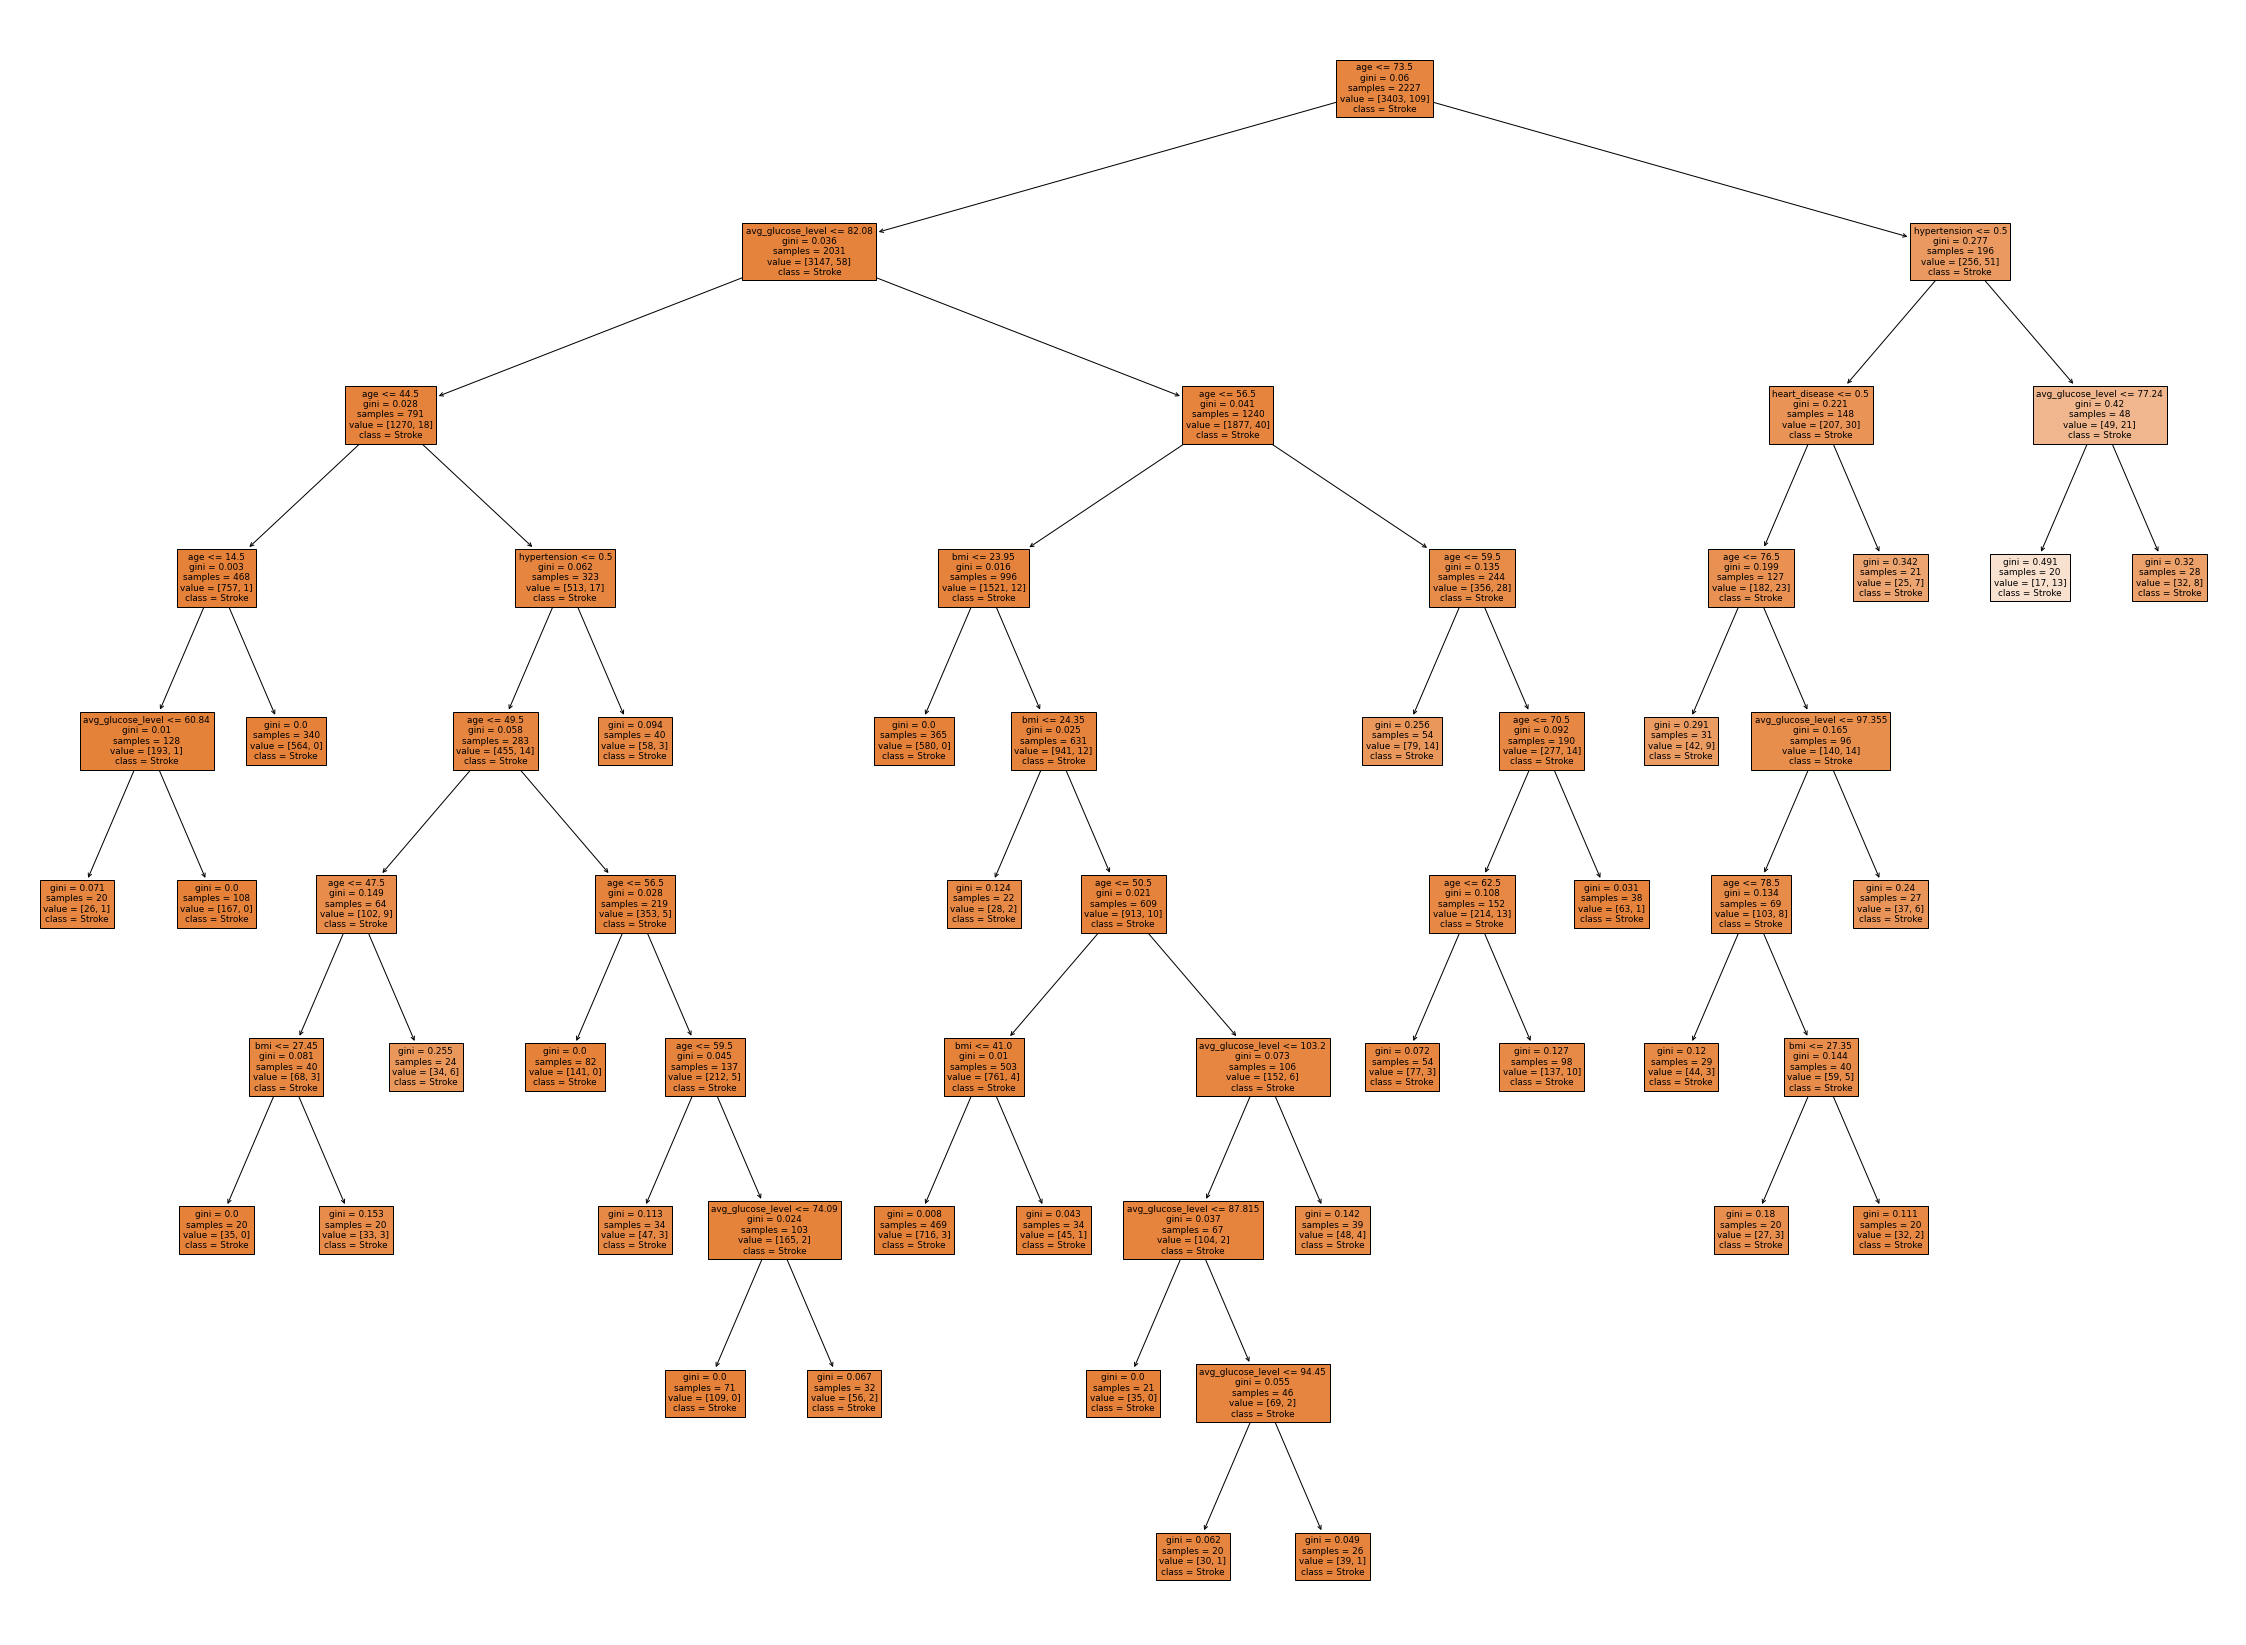

In [76]:
# plot random trees from random forest 
from sklearn.tree import plot_tree

randomized_best = random_search.best_estimator_

plt.figure(figsize=(40,30))

# tree created by estimators_[2], each tree is independent of each other
plot_tree(randomized_best.estimators_[2],feature_names = predictors.columns,class_names=['Stroke','No Stroke'],filled=True);

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.958997722095672


<AxesSubplot:>

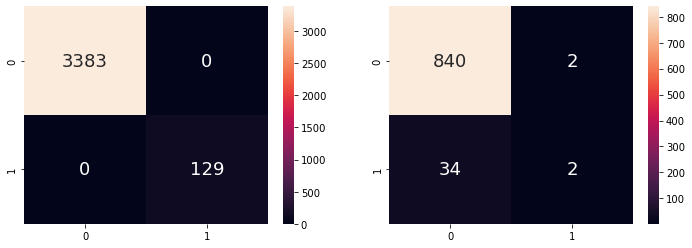

In [77]:
#predict stroke occurence
trainS_pred = rf.predict(X_predics)
testS_pred = rf.predict(Y_predics)

#check the goodness of fit 
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(Y_predics, Y_response))

#Plot the Confusion Martix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(X_response, trainS_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_response, testS_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [78]:
#accuracy of train data
CM = confusion_matrix(X_response, trainS_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = (TP)/(TP+FN) #true positive /(true positive+false negative)
print("The True Positive Rate for Train data is "+str(TPR))
FPR = (FP)/(FP+TN) #false positive /(false positive+true negative)
print("The False Positive Rate for Train data is "+str(FPR))
FNR = (FN)/(FN+TP)
print("The False Negative Rate for Train data is "+str(FNR))
TNR = (TN)/(TN+FP)
print("The True Negative Rate for Train data is "+str(TNR))

The True Positive Rate for Train data is 1.0
The False Positive Rate for Train data is 0.0
The False Negative Rate for Train data is 0.0
The True Negative Rate for Train data is 1.0


In [79]:
#accuracy of test data
CM = confusion_matrix(Y_response, testS_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = (TP)/(TP+FN) #true positive /(true positive+false negative)
print("The True Positive Rate for Test data is "+str(TPR))
FPR = (FP)/(FP+TN) #false positive /(false positive+true negative)
print("The False Positive Rate for Test data is "+str(FPR))
FNR = (FN)/(FN+TP)
print("The False Negative Rate for Test data is "+str(FNR))
TNR = (TN)/(TN+FP)
print("The True Negative Rate for Test data is "+str(TNR))

The True Positive Rate for Test data is 0.05555555555555555
The False Positive Rate for Test data is 0.0023752969121140144
The False Negative Rate for Test data is 0.9444444444444444
The True Negative Rate for Test data is 0.997624703087886


### Decision tree 

The decision tree will try to form a condition on the features to separate all the classes that are in the dataset to the fullest purity. 

In [83]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [84]:
#set up a regression analysis with 80% train sets and 20% test sets
#TRAIN AND TEST SETS
# Split the Dataset into Train and Test
predictors['bmi'].values.reshape(-1,1)
trainP, testP, trainS, testS = train_test_split(predictors, stroke, test_size = 0.2)

#check the sample sizes
print("Train Set :", trainP.shape, trainS.shape)
print("Test Set  :", testP.shape, testS.shape)

Train Set : (3512, 5) (3512, 1)
Test Set  : (878, 5) (878, 1)


[Text(0.5431034482758621, 0.9, 'X[0] <= 73.5\ngini = 0.068\nsamples = 3512\nvalue = [3388, 124]\nclass = No stroke'),
 Text(0.27586206896551724, 0.7, 'X[0] <= 48.5\ngini = 0.041\nsamples = 3188\nvalue = [3121, 67]\nclass = No stroke'),
 Text(0.13793103448275862, 0.5, 'X[0] <= 37.5\ngini = 0.011\nsamples = 2112\nvalue = [2100, 12]\nclass = No stroke'),
 Text(0.06896551724137931, 0.3, 'X[4] <= 57.935\ngini = 0.003\nsamples = 1540\nvalue = [1538, 2]\nclass = No stroke'),
 Text(0.034482758620689655, 0.1, 'gini = 0.048\nsamples = 41\nvalue = [40, 1]\nclass = No stroke'),
 Text(0.10344827586206896, 0.1, 'gini = 0.001\nsamples = 1499\nvalue = [1498, 1]\nclass = No stroke'),
 Text(0.20689655172413793, 0.3, 'X[4] <= 97.825\ngini = 0.034\nsamples = 572\nvalue = [562, 10]\nclass = No stroke'),
 Text(0.1724137931034483, 0.1, 'gini = 0.052\nsamples = 376\nvalue = [366, 10]\nclass = No stroke'),
 Text(0.2413793103448276, 0.1, 'gini = 0.0\nsamples = 196\nvalue = [196, 0]\nclass = No stroke'),
 Text(0

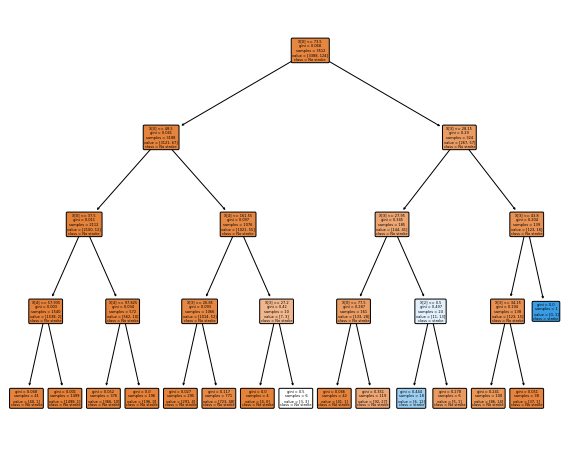

In [85]:
# Decision Tree 
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(trainP, trainS)   

# Plot the trained Decision Tree5
from sklearn.tree import plot_tree

f = plt.figure(figsize=(10,8))
plot_tree(dectree, filled=True, rounded=True, 
          class_names=["No stroke", "stroke"])

#### Confusion matrix

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9533029612756264


<AxesSubplot:>

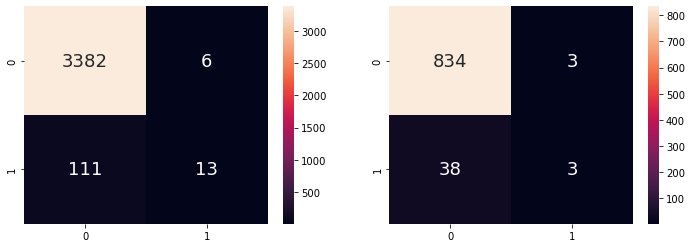

In [86]:
#predict stroke occurence
trainS_pred = dectree.predict(trainP)
testS_pred = dectree.predict(testP)

#check the goodness of fit 
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(testP, testS))

#Plot the Confusion Martix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(trainS, trainS_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(testS, testS_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [87]:
#accuracy of train data
CM = confusion_matrix(trainS, trainS_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = (TP)/(TP+FN) #true positive /(true positive+false negative)
print("The True Positive Rate for Train data is "+str(TPR))
FPR = (FP)/(FP+TN) #false positive /(false positive+true negative)
print("The False Positive Rate for Train data is "+str(FPR))
FNR = (FN)/(FN+TP)
print("The False Negative Rate for Train data is "+str(FNR))
TNR = (TN)/(TN+FP)
print("The True Negative Rate for Train data is "+str(TNR))

The True Positive Rate for Train data is 0.10483870967741936
The False Positive Rate for Train data is 0.0017709563164108619
The False Negative Rate for Train data is 0.8951612903225806
The True Negative Rate for Train data is 0.9982290436835891


In [88]:
#accuracy of test data
CM = confusion_matrix(testS, testS_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = (TP)/(TP+FN) #true positive /(true positive+false negative)
print("The True Positive Rate for Test data is "+str(TPR))
FPR = (FP)/(FP+TN) #false positive /(false positive+true negative)
print("The False Positive Rate for Test data is "+str(FPR))
FNR = (FN)/(FN+TP)
print("The False Negative Rate for Test data is "+str(FNR))
TNR = (TN)/(TN+FP)
print("The True Negative Rate for Test data is "+str(TNR))

The True Positive Rate for Test data is 0.07317073170731707
The False Positive Rate for Test data is 0.0035842293906810036
The False Negative Rate for Test data is 0.926829268292683
The True Negative Rate for Test data is 0.996415770609319


 <font color = Purple>Random Forest Decision Tree have a higher classification accuracy of 0.9632687927107062 while decision tree have a slightly lower classification accuracy of 0.9533029612756264. 

<font color = Purple>Furthermore, the true positive rate and true negative rate for the train data in Random Forest Decision Tree is much higher at 1.0 and 1.0 respectively. On the other hand, the true positive rate and true negative rate for the train data in Decision Tree is much lower at  0.10483870967741936 and 0.9982290436835891 respectively.

<font color = Purple>For the test data, they both have similar true negative and false negative rates. Hence, Random Forest Decision Tree is more accurate overall.

### Challenges that we faced

##### Imbalanced dataset

<font color = Purple>
    An issue that we faced with random forest and decision tree is that we have imbalanced data, with more than 4000 out of 5110 people without stroke and about 800 people with stroke. Since there is proportionately more no stroke values, the false negative rate and true negative rates will be high. Hence, this may result in a skew in the class distribution. In addition, the results after machine learning may be biased and inaccurate. Thus, we will use Synthetic Minority Oversampling Technique (SMOTE) to oversample the data of people with stroke so that our dataset will be more balanced.

##### Abnormal BMI distribution

<font color = Purple>
    Another issue that we faced is that generally, the BMI is very high with the median at 25 and that is abnormal as the average BMI is between 18.5 to 24.9. With a median of 25, it means that half of the people in the dataset have a bmi of above 25 and are obese. Thus a large number of the respondents are obese and this may make BMI seem like a negligible factor in predicting stroke, which is what we concluded. In order to overcome this, the data can be obtained from different geographical locations, to ensure that the BMI is more spreaded out.

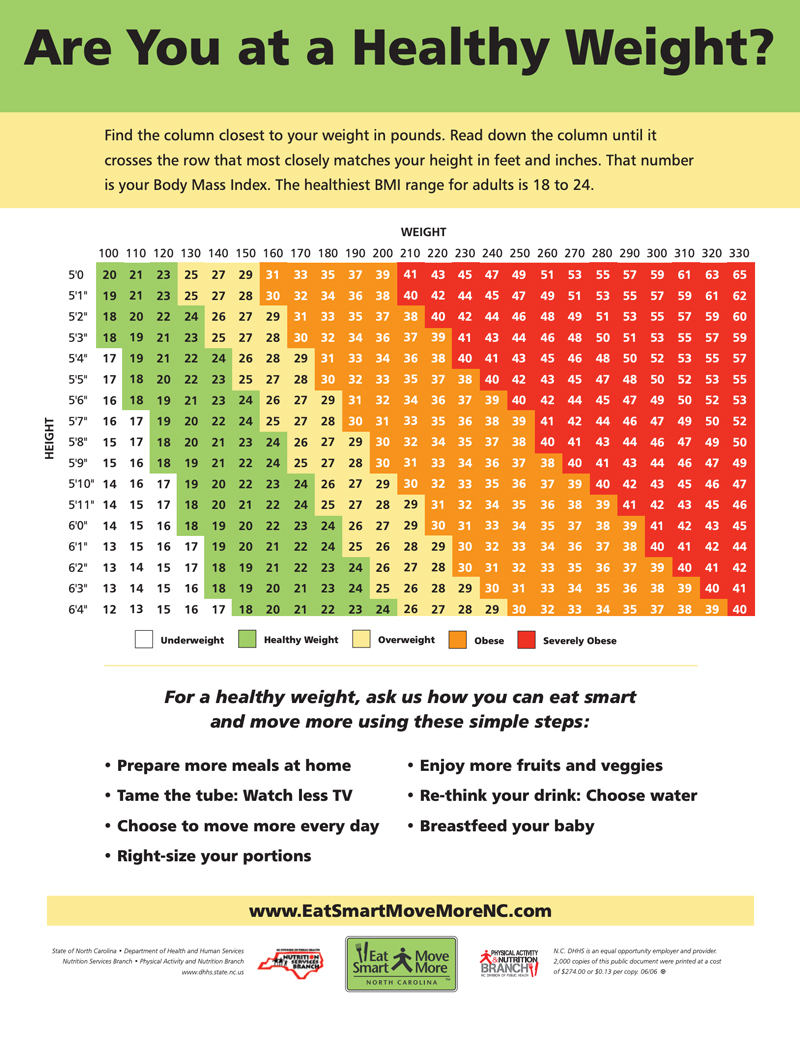

C:\Users\Shu Shuang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

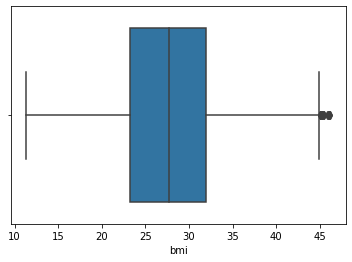

In [89]:
sb.boxplot(strokeData['bmi'])

#### Using SMOTE to fix the data imbalance and overcome our challenge

   One simple solution to imbalanced data is oversampling, where it creates duplicates data points, however, in extreme cases like our data set, it would create far too many identical data points, which would be problematic for any machine learning algorithm.
   SMOTE instead uses data augmentation, a method similar to oversampling. Rather than generating identical data points, SMOTE adds small perturbations to the newly created data points.
     
    
The SMOTE algorithm works by:
 - Taking a random sample data points from the minority class
 - Identify the k nearest neighbours for the observations from this sample data points
 - With one of those neighbours, identify the vector between the selected neighbour and the current data point
 - Multiply the vector by a random value from 0 to 1
 - In order to create the new synthetic data point, we can add it to the current data point
     
However, SMOTE only works on numerical data, and we have a mixed dataset on hand with both numerical and categorical data. Hence, we used a variation of SMOTE called SMOTE-NC(Nominal and Continuous). Instead of creating synthetic datapoints, SMOTE-NC would resample the categorical data. 

In [90]:
strokeData = pd.read_csv('healthcare-dataset-stroke-data.csv')

import statistics 

strokeData = strokeData.replace('Male', '0', regex=True)
strokeData = strokeData.replace('Female', '1', regex=True)
strokeData = strokeData.replace('Other', '2', regex=True)

strokeData = strokeData.replace('Yes', '1', regex=True)
strokeData = strokeData.replace('No', '0', regex=True)

strokeData = strokeData.replace('Private', '0', regex=True)
strokeData = strokeData.replace('Self-employed', '1', regex=True)
strokeData = strokeData.replace('Govt_job', '2', regex=True)
strokeData = strokeData.replace('children', '3', regex=True)
strokeData = strokeData.replace('Never_worked', '4', regex=True)

strokeData = strokeData.replace('Urban', '0', regex=True)
strokeData = strokeData.replace('Rural', '1', regex=True)

strokeData = strokeData.replace('never smoked', '0', regex=True)
strokeData = strokeData.replace('formerly smoked', '1', regex=True)
strokeData = strokeData.replace('smokes', '2', regex=True)
strokeData = strokeData.replace('Unknown', '3', regex=True)

#remove NaN in bmi and replace with median so data is still usable
bmiMedian = strokeData['bmi'].median()
strokeData['bmi'] = strokeData['bmi'].replace("unknown", "Nan")
strokeData['bmi'] = strokeData['bmi'].fillna(bmiMedian)

strokeData = strokeData.drop(columns='id', axis = 1)

strokeData.shape

(5110, 11)

In [91]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(strokeData, test_size = 0.3, stratify = strokeData.stroke)

from imblearn.over_sampling import SMOTENC
X_resampled, y_resampled = SMOTENC(categorical_features=[0,2,3,4,5,6,9]).fit_resample(train[['gender','age','hypertension','heart_disease','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']], train['stroke'])
strokeData = pd.concat([X_resampled, y_resampled], axis = 1).reindex(X_resampled.index)
strokeData = strokeData.T.drop_duplicates().T

#remove NaN in bmi and replace with median so data is still usable
bmiMedian = strokeData['bmi'].median()
strokeData['bmi'] = strokeData['bmi'].replace("unknown", "Nan")
strokeData['bmi'] = strokeData['bmi'].fillna(bmiMedian)

strokeData.shape

(6806, 11)

In [92]:
#Extract individual columns into their respective data frames
gender = pd.DataFrame(strokeData['gender'])
age = pd.DataFrame(strokeData['age'])
hypertension = pd.DataFrame(strokeData['hypertension'])
heart_disease = pd.DataFrame(strokeData['heart_disease'])
ever_married = pd.DataFrame(strokeData['ever_married'])
work_type = pd.DataFrame(strokeData['work_type'])
Residence_type = pd.DataFrame(strokeData['Residence_type'])
avg_glucose_level = pd.DataFrame(strokeData['avg_glucose_level'])
bmi = pd.DataFrame(strokeData['bmi'])
smoking_status = pd.DataFrame(strokeData['smoking_status'])
stroke = pd.DataFrame(strokeData['stroke'])

#### Comparing the accuracy of Chi-Square test and Naive Bayes Test after SMOTE 

Chi-Square Test

In [93]:
#comparing between hypertension and heart disease
from scipy.stats import chi2_contingency
HypHeartJoint = pd.crosstab(strokeData['hypertension'], strokeData['heart_disease'])
chi2, pval, dof, expected = chi2_contingency(HypHeartJoint)
if pval < 0.05:
    print('The two variables, hypertension and heart disease are dependent.')
else:
    print('The two variables, hypertension and heart disease are independent.')

The two variables, hypertension and heart disease are dependent.


In [94]:
#comparing between smoking status and stroke
smokeSJoint = pd.crosstab(strokeData['smoking_status'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(smokeSJoint)
if pval < 0.05:
    print('The two variables, smoking status and stroke are dependent.')
else:
    print('The two variables, smoking status and stroke are independent.')

The two variables, smoking status and stroke are dependent.


In [95]:
#comparing between smoking status and worktype
smokeWorkJoint = pd.crosstab(strokeData['smoking_status'], strokeData['work_type'])
chi2, pval, dof, expected = chi2_contingency(smokeWorkJoint)
if pval < 0.05:
    print('The two variables, smoking status and worktype are dependent.')
else:
    print('The two variables, smoking status and worktype are independent.')

The two variables, smoking status and worktype are independent.


In [96]:
#comparing between work type and residence type
workResJoint = pd.crosstab(strokeData['work_type'], strokeData['Residence_type'])
chi2, pval, dof, expected = chi2_contingency(workResJoint)
if pval < 0.05:
    print('The two variables, work type and residence type are dependent.')
else:
    print('The two variables, work type and residence type are independent.')

The two variables, work type and residence type are independent.


In [97]:
#comparing between age and stroke
ageSJoint = pd.crosstab(strokeData['age'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(ageSJoint)
if pval < 0.05:
    print('The two variables, age and stroke are dependent.')
else:
    print('The two variables, age and stroke are independent.')

The two variables, age and stroke are dependent.


In [98]:
#comparing between bmi and stroke
bmiSJoint = pd.crosstab(strokeData['bmi'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(bmiSJoint)
if pval < 0.05:
    print('The two variables, bmi and stroke are dependent.')
else:
    print('The two variables, bmi and stroke are independent.')

The two variables, bmi and stroke are dependent.


In [99]:
#comparing between avg_glucose_level and stroke
aglSJoint = pd.crosstab(strokeData['avg_glucose_level'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(aglSJoint)
if pval < 0.05:
    print('The two variables, avg_glucose_level and stroke are dependent.')
else:
    print('The two variables, avg_glucose_level and stroke are independent.')

The two variables, avg_glucose_level and stroke are dependent.


In [100]:
#comparing between heart_disease and stroke
HDSJoint = pd.crosstab(strokeData['heart_disease'], strokeData['stroke'])
chi2, pval, dof, expected = chi2_contingency(HDSJoint)
if pval < 0.05:
    print('The two variables, heart_disease and stroke are dependent.')
else:
    print('The two variables, heart_disease and stroke are independent.')

The two variables, heart_disease and stroke are dependent.


<font color = Purple>Chi-square test improvement
   
<font color = Purple>After using SMOTE to balance our dataset, there was a change in the variables that is stroke is dependent on, namely bmi and average glucose level. As there is an increase in sample size, it allowed the chi-square test to more accurately determine the variables that stroke is dependent on. This also corroborates with the Naive Bayes where stroke is also dependent on bmi and average glucose level

#### Random Forest Decision Tree after SMOTE

In [101]:
bmiMedian = strokeData['bmi'].median()
strokeData['bmi'] = strokeData['bmi'].replace("unknown", "Nan")
strokeData['bmi'] = strokeData['bmi'].fillna(bmiMedian)

predictors = pd.DataFrame(strokeData[['age','hypertension','heart_disease','bmi','avg_glucose_level']])
predictors['bmi'].values.reshape(-1,1)
X_predics,Y_predics,X_response,Y_response = train_test_split(predictors,stroke,test_size = 0.20, random_state = 42)

X_predics = X_predics.astype('int')
X_response = X_response.astype('int')
Y_predics = Y_predics.astype('int')
Y_response = Y_response.astype('int')

# import Random Forest and fit the data into the model
rf = RandomForestClassifier(random_state=42,n_jobs=-1)
rf.fit(X_predics,X_response)

# use the current model and the test set of age, hypertension and heart disease to predict the response 
response_pred = rf.predict(Y_predics)
print("Accuracy of test set of predictors: ",metrics.accuracy_score(Y_response,response_pred))

C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_31032\1717582180.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_predics,X_response)


Accuracy of test set of predictors:  0.8906020558002937


In [102]:
# use Randomised Search to do hyperparameter tuning to maximize the model's predictive accuracy

params = {'max_depth': [2,3,5,10,15],
          'min_samples_leaf': [5,10,20],
          'n_estimators': [10,25,30],
}

# Initialize RandomizedSearchCV for the parameters
random_search = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

# Random search chooses random combinations of hyperparameters to train the Random Forest model
# require shorter time to compute but may not be as accurate
random_search.fit(X_predics,X_response)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


C:\Users\Shu Shuang\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 15],
                                        'min_samples_leaf': [5, 10, 20],
                                        'n_estimators': [10, 25, 30]},
                   scoring='accuracy', verbose=1)

In [103]:
# find the best estimator for randomized search
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)


In [104]:
# print the highest accuracy model 
print("Highest accuracy model: " + str(random_search.best_score_))

Highest accuracy model: 0.8760102865540045


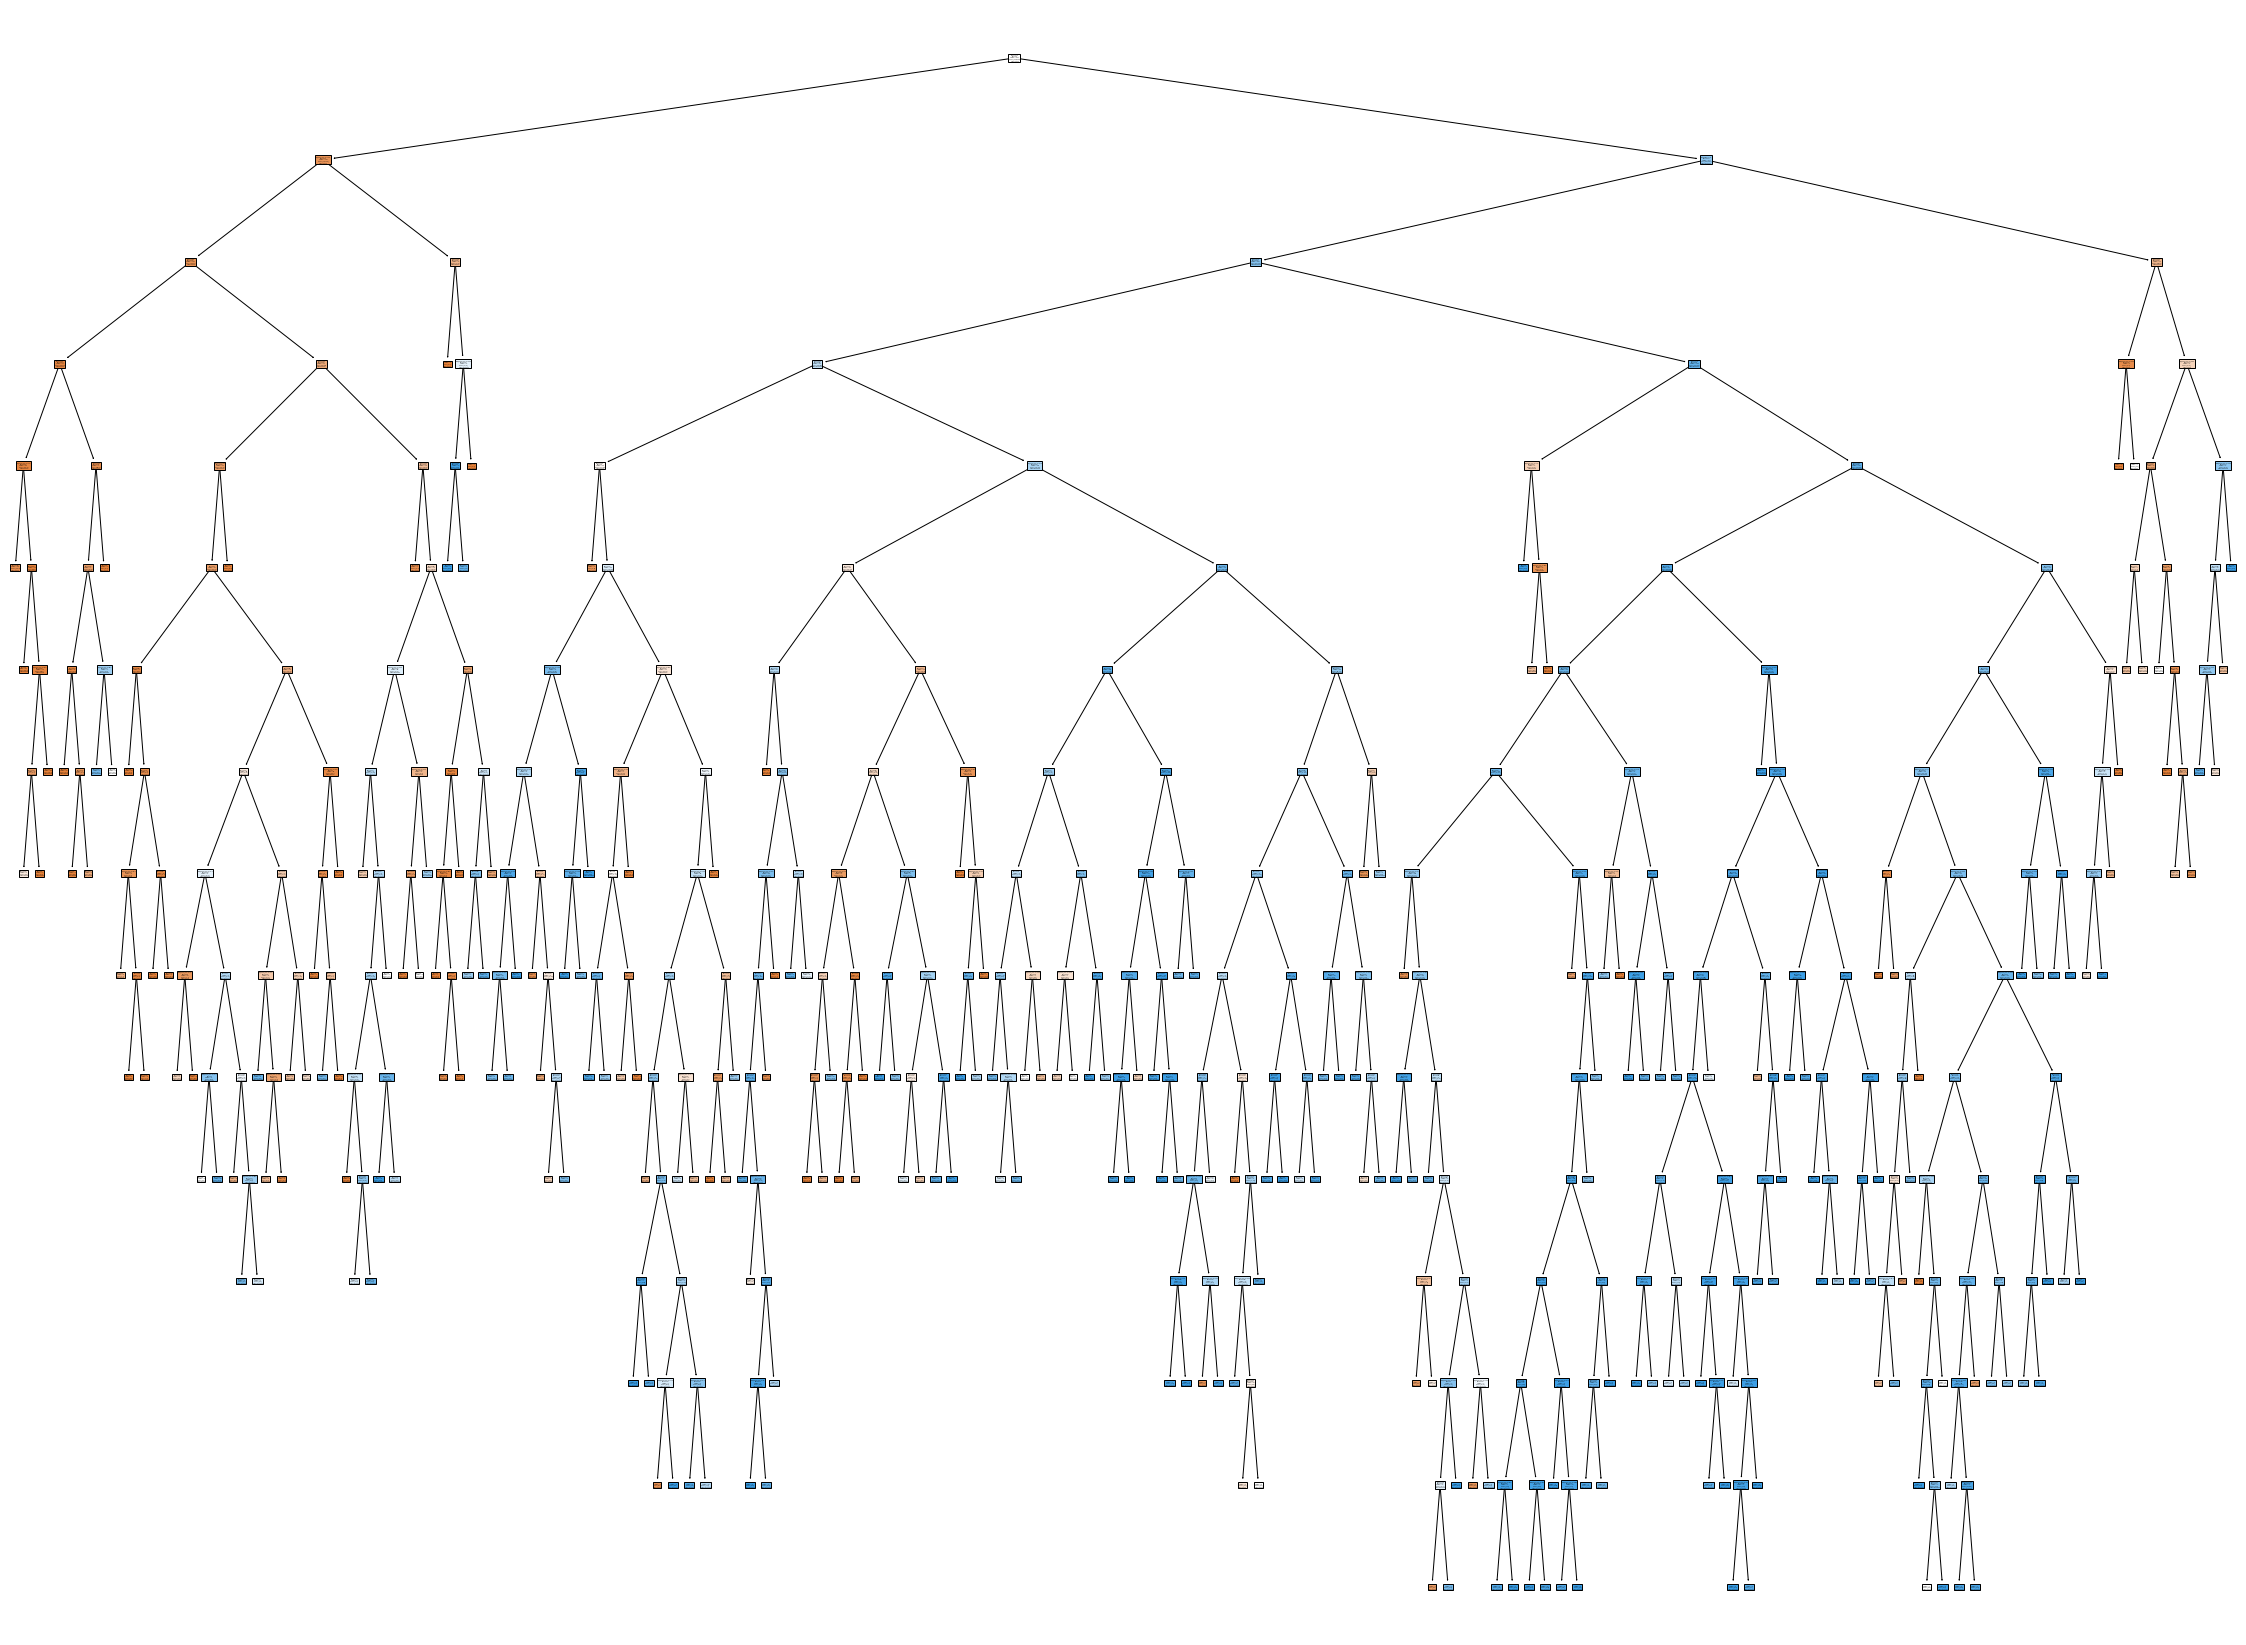

In [105]:
# plot random trees from random forest 
from sklearn.tree import plot_tree

randomized_best = random_search.best_estimator_

plt.figure(figsize=(40,30))

# tree created by estimators_[2], each tree is independent of each other
plot_tree(randomized_best.estimators_[2],feature_names = predictors.columns,class_names=['Stroke','No Stroke'],filled=True);

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8906020558002937


<AxesSubplot:>

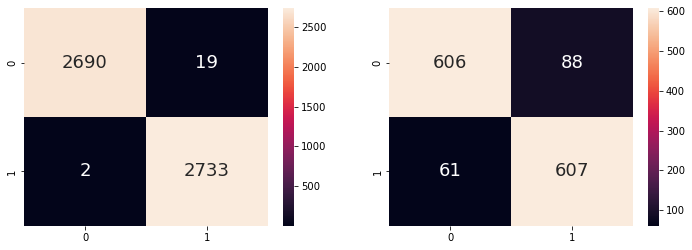

In [106]:
#predict stroke occurence
trainS_pred = rf.predict(X_predics)
testS_pred = rf.predict(Y_predics)

#check the goodness of fit 
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(Y_predics, Y_response))

#Plot the Confusion Martix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(X_response, trainS_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_response, testS_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [107]:
#accuracy of train data
CM = confusion_matrix(X_response, trainS_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = (TP)/(TP+FN) #true positive /(true positive+false negative)
print("The True Positive Rate for Train data is "+str(TPR))
FPR = (FP)/(FP+TN) #false positive /(false positive+true negative)
print("The False Positive Rate for Train data is "+str(FPR))
FNR = (FN)/(FN+TP)
print("The False Negative Rate for Train data is "+str(FNR))
TNR = (TN)/(TN+FP)
print("The True Negative Rate for Train data is "+str(TNR))

The True Positive Rate for Train data is 0.9992687385740402
The False Positive Rate for Train data is 0.0070136581764488745
The False Negative Rate for Train data is 0.0007312614259597807
The True Negative Rate for Train data is 0.9929863418235512


In [108]:
#accuracy of test data
CM = confusion_matrix(Y_response, testS_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = (TP)/(TP+FN) #true positive /(true positive+false negative)
print("The True Positive Rate for Test data is "+str(TPR))
FPR = (FP)/(FP+TN) #false positive /(false positive+true negative)
print("The False Positive Rate for Test data is "+str(FPR))
FNR = (FN)/(FN+TP)
print("The False Negative Rate for Test data is "+str(FNR))
TNR = (TN)/(TN+FP)
print("The True Negative Rate for Test data is "+str(TNR))

The True Positive Rate for Test data is 0.9086826347305389
The False Positive Rate for Test data is 0.12680115273775217
The False Negative Rate for Test data is 0.09131736526946108
The True Negative Rate for Test data is 0.8731988472622478


<font color = Purple> Random forest classifier:
Even though the classification accuracy decreased from 0.9632687927107062 to 0.8906020558002937, there is an increase in the True Positive Rate and the True Negative Rate. Hence, it shows that with SMOTE, we can more accurately classify our data and get a more accurate prediction of whether one will have stroke or not.

### Conclusion 

<font color = Purple>We noticed that in general, the BMI is above 30 as seen in the box plot and that is abnormal as the average BMI is between 18.5 to 24.9. (box plot description) Thus a large number of the respondents are obese and this may make BMI seem like a negligible factor in predicting stroke, which is what we concluded. In order to overcome this, the data can be obtained from different geographical locations, to ensure that the BMI is more spreaded out. 

<font color = Purple>We also deduced from our findings that the risk of stroke is increased by the existence of heart disease, hypertension and high glucose levels. Additionally, there is a clear link between age and stroke, and this can be associated with the fact that older people are more susceptible to stroke. There is no clear link between stroke and work type, residence type, gender and smoking status. 

<font color = Purple>To answer our initial question on which factor is the most important to predict the occurrence of stroke, there is no one clear factor to predict stroke since the correlation between stroke and the other factors is 0.38 or less, which is not very accurate. Hence, the combination of the few factors which have been mentioned above are important factors which have to be considered concurrently when predicting the occurrence of stroke. Below we will be including some recommendations to reduce the risk of stroke based on our findings.

#### Recommendations

1. <font color = Purple>Since age is an irreversible factor, we would recommend older patients to constantly monitor their health and visit doctors for health checkups regularly.
2. <font color = Purple>People with conditions such as hypertension, heart disease and diabetes should be encouraged to have their doctors monitor them, in order to better prevent stroke. 
3. <font color = Purple>The general public should be educated on the negative effects of excessive consumption of sugar to prevent high glucose levels.
4. <font color = Purple>Overweight people should be encouraged to put in efforts to lose some weight such that they are within the healthy bmi range, in order to reduce their chances of having a stroke. 
